**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

# Data Preparation

In [5]:
class_name = 'churn'
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/Data_&_Code/churn.csv', skipinitialspace=True, na_values='?', keep_default_na=True)

columns2remove = ['phone number']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [18]:
X

array([['KS', 128, 415, ..., 3, 2.7, 1],
       ['OH', 107, 415, ..., 3, 3.7, 1],
       ['NJ', 137, 415, ..., 5, 3.29, 0],
       ...,
       ['RI', 28, 510, ..., 6, 3.81, 2],
       ['CT', 184, 510, ..., 10, 1.35, 2],
       ['TN', 74, 415, ..., 4, 3.7, 0]], dtype=object)

In [24]:
df1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/jupyter_notebooks/data/datatraining_fix_min.csv')

In [25]:
dfval = df1.to_numpy()

In [26]:
dfval

array([['2015-02-04 17:51:00', 23.18, 27.272, ..., 721.25,
        0.00479298817650529, 1],
       ['2015-02-04 17:52:00', 23.15, 27.2675, ..., 714.0,
        0.00478344094931065, 1],
       ['2015-02-04 17:53:00', 23.15, 27.245, ..., 713.5,
        0.00477946352442199, 1],
       ...,
       ['2015-02-10 09:31:00', 21.1, 36.095, ..., 798.5,
        0.0055956390183456795, 1],
       ['2015-02-10 09:32:00', 21.1, 36.26, ..., 820.333333333333,
        0.00562144937350851, 1],
       ['2015-02-10 09:33:00', 21.1, 36.2, ..., 821.0,
        0.00561206354418701, 1]], dtype=object)

In [10]:
import sys
sys.path.append('./')

In [14]:
from data_preparation import prepare_dataset

In [15]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [31]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Box Plot

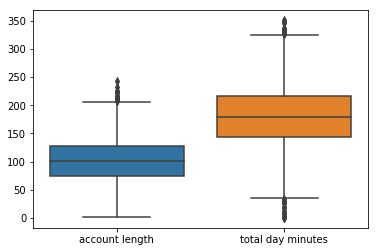

In [44]:
sns.boxplot(data=[X[:,0], X[:,3]])
plt.xticks([0,1], [attributes[0], attributes[3]])
plt.show()

# DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

In [51]:
dbscan = DBSCAN(eps=100, min_samples=4)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=100, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [52]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([   3, 3330]))

In [54]:
rdf.loc[np.where(dbscan.labels_==-1)]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state,international plan,voice mail plan,churn
1397,101,510,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,VT,no,no,False
2663,172,510,0,169.8,123,28.87,183.1,94,15.56,395.0,72,17.77,12.7,7,3.43,2,VA,no,no,False
2932,97,415,0,209.2,134,35.56,0.0,0,0.00,175.4,94,7.89,11.8,6,3.19,1,UT,no,no,False


# LOF

In [12]:
from sklearn.neighbors import LocalOutlierFactor

In [14]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X)

negative_outlier_factor_

The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

In [15]:
clf.negative_outlier_factor_

array([-1.10052593, -1.12084333, -1.03265367, ..., -1.04033375,
       -1.26349059, -1.07912739])

In [17]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  75, 3258]))

In [18]:
np.where(outliers==-1)

(array([  30,  186,  201,  372,  395,  438,  556,  580,  599,  645,  648,
         652,  692,  759,  883,  893,  901,  960,  964, 1020, 1057, 1121,
        1130, 1147, 1177, 1202, 1266, 1307, 1313, 1317, 1345, 1408, 1455,
        1525, 1526, 1739, 1750, 1751, 1786, 1846, 1872, 1929, 2028, 2071,
        2072, 2188, 2217, 2277, 2312, 2321, 2336, 2394, 2400, 2536, 2614,
        2659, 2663, 2688, 2736, 2767, 2792, 2824, 2831, 2884, 2932, 2933,
        2996, 3046, 3143, 3175, 3187, 3188, 3208, 3219, 3304]),)

In [19]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([-1.83730295, -1.53613953, -1.56713143, -1.52145753, -2.02533549,
       -1.78622723, -1.51681569, -1.76064078, -1.56228873, -1.58880338,
       -1.52588056, -1.59314858, -1.70288884, -1.50633203, -1.58611409,
       -1.84649101, -1.59083805, -1.99040643, -1.64844436, -1.62823488,
       -1.53543857, -1.75805073, -1.65296133, -1.56760922, -1.57308972,
       -2.04333247, -1.50567866, -1.51522435, -1.59848919, -1.81998356,
       -2.04338912, -1.54447614, -1.59907932, -1.57617066, -1.51282262,
       -1.59594499, -1.65835369, -1.63515368, -1.54027725, -1.51107506,
       -1.71784856, -1.57226646, -1.79897455, -1.65139572, -1.62418112,
       -1.50967113, -1.85517426, -1.55326141, -1.52324167, -1.50391523,
       -1.55182985, -1.505159  , -1.53511943, -1.73227796, -1.67225116,
       -1.79047115, -1.77811973, -1.51498407, -1.73595144, -1.50105965,
       -1.73289216, -1.94831336, -1.60971675, -1.65626837, -1.86505275,
       -1.68210996, -1.58615877, -1.59336984, -1.66341813, -1.67

In [22]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-1.501059653880234

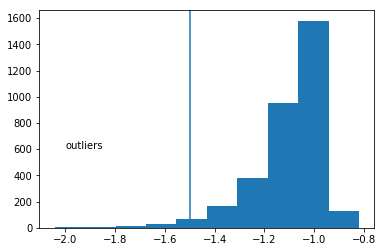

In [24]:
plt.hist(clf.negative_outlier_factor_)
plt.axvline(-1.5)
plt.text(-2, 600, 'outliers')
plt.show()

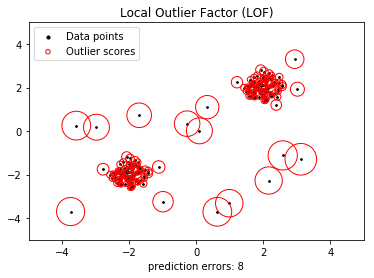

In [25]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [55]:
from sklearn.ensemble import IsolationForest

In [56]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [57]:
outliers = clf.predict(X_test)

In [58]:
np.unique(outliers, return_counts=True)

(array([1]), array([1000]))

# PyOD

https://pyod.readthedocs.io/en/latest/#

In [63]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.models.auto_encoder import AutoEncoder

## ABOD

In [64]:
clf = ABOD()
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [65]:
clf.decision_scores_

array([-1.73850724e-08, -3.73897992e-08, -4.78029350e-08, ...,
       -1.18645859e-08, -5.93760626e-09, -9.41113044e-09])

In [68]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([2905,  428]))

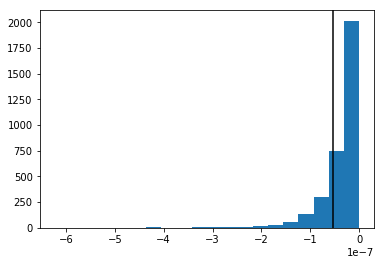

In [74]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

## KNN

In [75]:
clf = KNN()
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [76]:
clf.decision_scores_

array([50.1970527 , 40.96002197, 42.48971052, ..., 63.48962671,
       69.36711036, 46.6428569 ])

In [78]:
anomlay_score = clf.decision_function(X)

In [80]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([3065,  268]))

In [83]:
np.mean(anomlay_score[np.where(outliers==1)])

77.62972822118913

In [84]:
np.mean(anomlay_score[np.where(outliers==0)])

47.499403841368725

In [85]:
np.mean(clf.decision_scores_[np.where(outliers==1)])

79.75725102877037

In [86]:
np.mean(clf.decision_scores_[np.where(outliers==0)])

49.21066211491309

## LOF

In [88]:
clf = LOF()
clf.fit(X)

outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([3042,  291]))

# AutoEncoder

In [92]:
clf = AutoEncoder(epochs=10)

In [93]:
clf.fit(X)

outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 71)                5112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 71)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 71)                5112      
_________________________________________________________________
dropout_8 (Dropout)          (None, 71)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4608      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)               

(array([0, 1]), array([2999,  334]))

In [94]:
anomlay_score = clf.decision_function(X)

In [99]:
outliers_proba = clf.predict_proba(X)

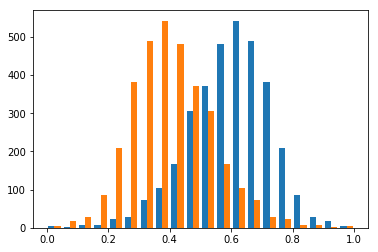

In [101]:
plt.hist(outliers_proba, bins=20)
#plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='k')
plt.show()

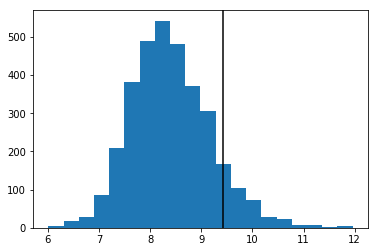

In [103]:
plt.hist(anomlay_score, bins=20)
plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='k')
plt.show()

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


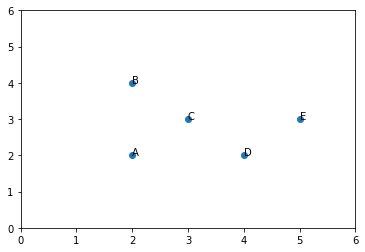

In [11]:
D = np.array([
    [2, 2],
    [2, 4],
    [3, 3],
    [4, 2],
    [5, 3],
])


plt.scatter(D[:, 0], D[:, 1])
for d, l in zip(D, ['A', 'B', 'C', 'D', 'E']):
    plt.text(d[0], d[1], l)
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.show()

In [16]:
from scipy.spatial.distance import pdist, squareform

In [24]:
dist = squareform(pdist(D, 'cityblock'))
for i in range(len(dist)):
    dist[i, i] = np.inf
dist

array([[inf,  2.,  2.,  2.,  4.],
       [ 2., inf,  2.,  4.,  4.],
       [ 2.,  2., inf,  2.,  2.],
       [ 2.,  4.,  2., inf,  2.],
       [ 4.,  4.,  2.,  2., inf]])

In [29]:
k = 3
knn = np.argsort(dist, axis=1)[:, :k]
knn

array([[1, 2, 3],
       [0, 2, 3],
       [0, 1, 3],
       [0, 2, 4],
       [2, 3, 0]])

In [45]:
Rknn = np.zeros((len(dist), len(dist)))
for i in range(len(dist)):
    for j in knn[i]:
        Rknn[j][i] = 1
Rknn

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [46]:
Rknn_count = np.sum(Rknn, axis=1)
Rknn_count.reshape(-1,1)

array([[4.],
       [2.],
       [4.],
       [4.],
       [1.]])